# **EV Product Strategy: Aligning with Market Demand**

---



## **Problem Statement**

---



*In the context of the rapidly evolving electric vehicle (EV) market, a startup or company is faced with the challenge of making strategic decisions about which types of EVs to manufacture and which markets to target. With a forecasted continual increase in EV adoption, the company needs to determine which vehicle categories—ranging from personal and commercial vehicles to more niche segments like buses and goods vehicles—will meet the growing demand. Additionally, it must identify which geographic regions will be most receptive to their offerings. The goal is to make informed decisions that align with both current trends and future market potential, ensuring successful entry and competitive positioning in the EV industry.*



---



## **Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df=pd.read_excel('/content/drive/MyDrive/EV Segmentation/EV-Data-StateWise.xlsx')

In [18]:
df.sample(2)

,Year,Month_name,Day,Date,State,Vehicle Class,Vehicle Category,Vehicle Type,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,DUAL DIESEL/BIO CNG,DUAL DIESEL/CNG,DUAL DIESEL/LNG,ELECTRIC(BOV),ETHANOL,FUEL CELL HYDROGEN,LNG,LPG ONLY,METHANOL,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Total
46697,2014,jan,1,2014-01-01,Maharashtra,AMBULANCE,Others,Others,0,176,0,0,0,0,0,0,0,0,0,0,0,0,40,2,0,0,0,0,0,218
39895,2019,mar,1,2019-03-01,Kerala,QUADRICYCLE (PRIVATE),Others,Others,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3


In [19]:
df.shape

(96845, 30)

In [20]:
data=df.copy()
data.sample(5)

,Year,Month_name,Day,Date,State,Vehicle Class,Vehicle Category,Vehicle Type,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,DUAL DIESEL/BIO CNG,DUAL DIESEL/CNG,DUAL DIESEL/LNG,ELECTRIC(BOV),ETHANOL,FUEL CELL HYDROGEN,LNG,LPG ONLY,METHANOL,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Total
52928,2014,nov,1,2014-11-01,Madhya Pradesh,AGRICULTURAL TRACTOR,Others,Others,0,7432,0,0,0,0,0,0,0,0,0,0,0,8,11,0,0,0,4,0,0,7455
65163,2018,feb,1,2018-02-01,Rajasthan,CAMPER VAN / TRAILER,Others,Others,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
21292,2022,aug,1,2022-08-01,Gujarat,E-RICKSHAW WITH CART (G),3-Wheelers,3W_Goods_LowSpeed,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,21
55826,2022,jan,1,2022-01-01,Odisha,MOTORISED CYCLE (CC > 25CC),2-Wheelers,2W_Personal,0,0,0,0,0,0,0,10,0,0,0,0,0,0,554,0,0,0,0,0,0,564
7022,2015,aug,1,2015-08-01,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,366,0,0,0,0,0,0,366


In [21]:
data.drop(columns=['Year','Month_name','Day'],inplace=True)

In [22]:
# Check for missing values and basic info about the dataset
missing_values = data.isnull().sum()
data_info = data.info()

# Summarize key statistics for numerical columns to understand the data distribution
numerical_summary = data.describe()
print(data_info)
print()
print(missing_values)
print()
pd.DataFrame(numerical_summary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 96845 non-null  datetime64[ns]
 1   State                96845 non-null  object        
 2   Vehicle Class        96845 non-null  object        
 3   Vehicle Category     96845 non-null  object        
 4   Vehicle Type         96845 non-null  object        
 5   CNG ONLY             96845 non-null  int64         
 6   DIESEL               96845 non-null  int64         
 7   DIESEL/HYBRID        96845 non-null  int64         
 8   DI-METHYL ETHER      96845 non-null  int64         
 9   DUAL DIESEL/BIO CNG  96845 non-null  int64         
 10  DUAL DIESEL/CNG      96845 non-null  int64         
 11  DUAL DIESEL/LNG      96845 non-null  int64         
 12  ELECTRIC(BOV)        96845 non-null  int64         
 13  ETHANOL              96845 non-

,Date,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,DUAL DIESEL/BIO CNG,DUAL DIESEL/CNG,DUAL DIESEL/LNG,ELECTRIC(BOV),ETHANOL,FUEL CELL HYDROGEN,LNG,LPG ONLY,METHANOL,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Total
count,96845,96845.000000,96845.000000,96845.000000,96845.0,96845.0,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.000000,96845.0,96845.000000,96845.000000
mean,2019-01-28 11:00:33.641385728,11.650823,272.809283,1.616955,0.0,0.0,0.000475,0.000010,37.108896,0.000671,0.000021,0.002881,0.907398,0.000062,9.768145,1862.810264,35.887408,4.500026,8.675915,6.410956,0.0,0.008601,2252.158790
min,2014-01-01 00:00:00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
25%,2016-08-01 00:00:00,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.000000
50%,2019-02-01 00:00:00,0.000000,5.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,24.000000
75%,2021-09-01 00:00:00,0.000000,59.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,246.000000
max,2024-01-01 00:00:00,6852.000000,25015.000000,2004.000000,0.0,0.0,3.000000,1.000000,20584.000000,10.000000,1.000000,44.000000,735.000000,1.000000,4307.000000,370384.000000,15000.000000,17266.000000,4276.000000,4047.000000,0.0,26.000000,378779.000000
std,NaN,138.673960,1053.241395,29.404324,0.0,0.0,0.027639,0.003213,431.566675,0.046672,0.004544,0.244475,16.361972,0.007871,85.675666,12486.188889,354.948849,147.143291,104.598617,83.484813,0.0,0.242815,12751.813145


> Summary statistics for various fuel types used in vehicles, with the following key insights:
  * CNG, Diesel, and Petrol are the most common fuel types, as indicated by the higher mean values (11.65, 272.81, and 1862.81, respectively).
  * Electric (BOV) shows growing adoption, with a mean value of 37.1 and a maximum of 20,584, suggesting a noticeable number of electric vehicles in the dataset.
  * Diesel/Hybrid and Petrol/Hybrid also appear, indicating some hybrid vehicle adoption, though their means are relatively low (1.62 and 35.88).
  * Alternative fuels like Fuel Cell Hydrogen, LNG, Methanol, and others have minimal adoption, with very low mean values, indicating they are rarely used.
  * The time range spans from 2014 to 2024, with significant growth in vehicle types over time.


---




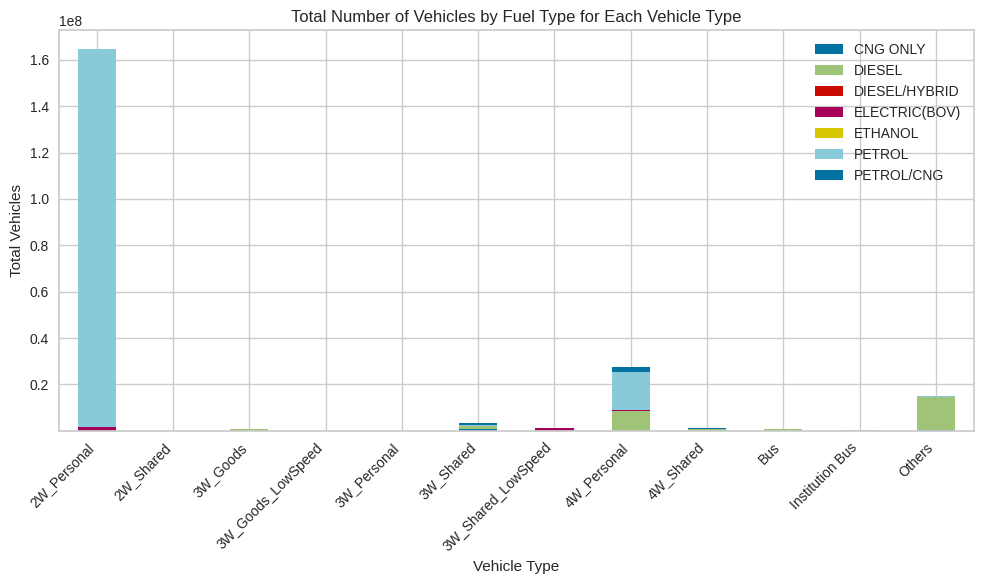

In [23]:
# Aggregating data by Vehicle Type and Fuel Type
fuel_columns = ['CNG ONLY', 'DIESEL', 'DIESEL/HYBRID', 'ELECTRIC(BOV)', 'ETHANOL', 'PETROL', 'PETROL/CNG']
vehicle_fuel_data = data.groupby('Vehicle Type')[fuel_columns].sum()
vehicle_fuel_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Number of Vehicles by Fuel Type for Each Vehicle Type')
plt.ylabel('Total Vehicles')
plt.xlabel('Vehicle Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




> We can clearly see that Petrol is the predominant fuel type for most vehicle categories, particularly in '2W Personal' vehicles, where it overwhelmingly dominates the chart. Other fuel types like Electric (BOV), Ethanol, and Diesel have much smaller representations, suggesting limited usage in the vehicle types displayed.


---





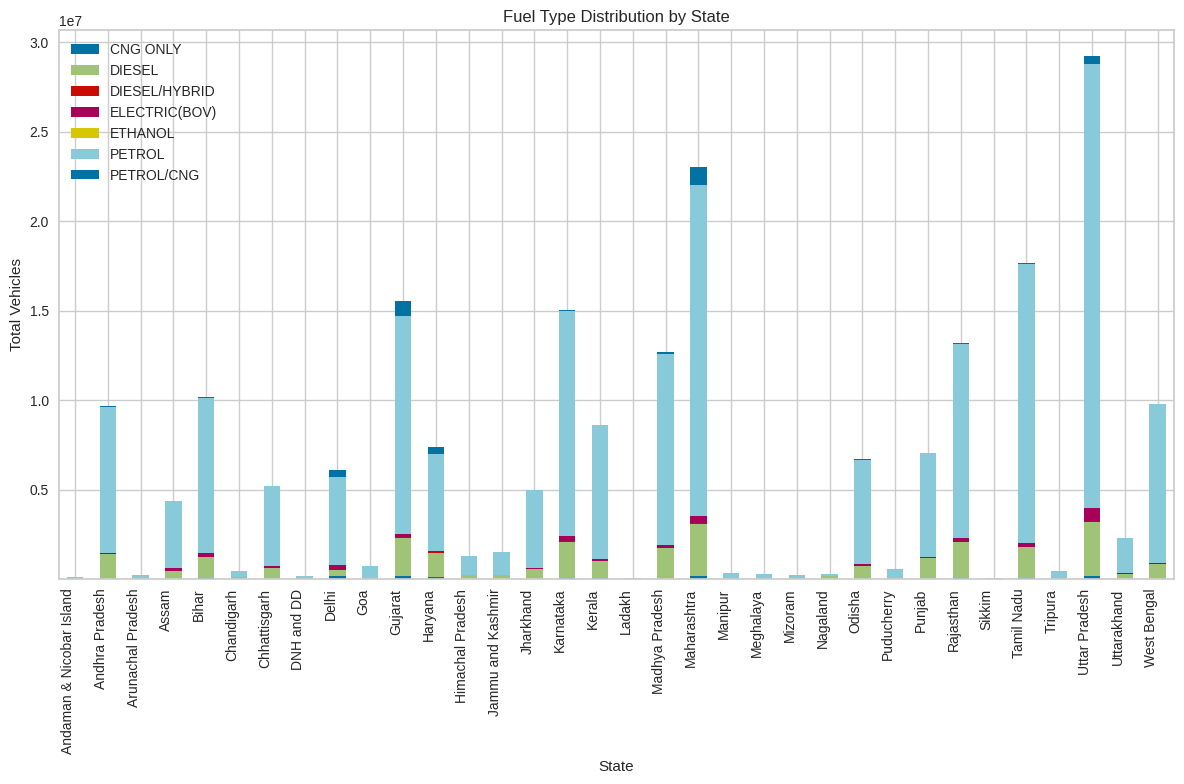

In [24]:
# Aggregating data by State and fuel type
fuel_by_state = data.groupby('State')[fuel_columns].sum()
fuel_by_state.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Fuel Type Distribution by State')
plt.ylabel('Total Vehicles')
plt.xlabel('State')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()




> * It's clear that Petrol is the dominant fuel type across most states.
* Electric (BOV) vehicles are indicated in red. They show noticeable representation in Assam, Bihar,Delhi,Karnataka,Maharashtra,Uttar Pradesh and Tamil Nadu, indicating a higher adoption of electric vehicles in these states compared to others.


---




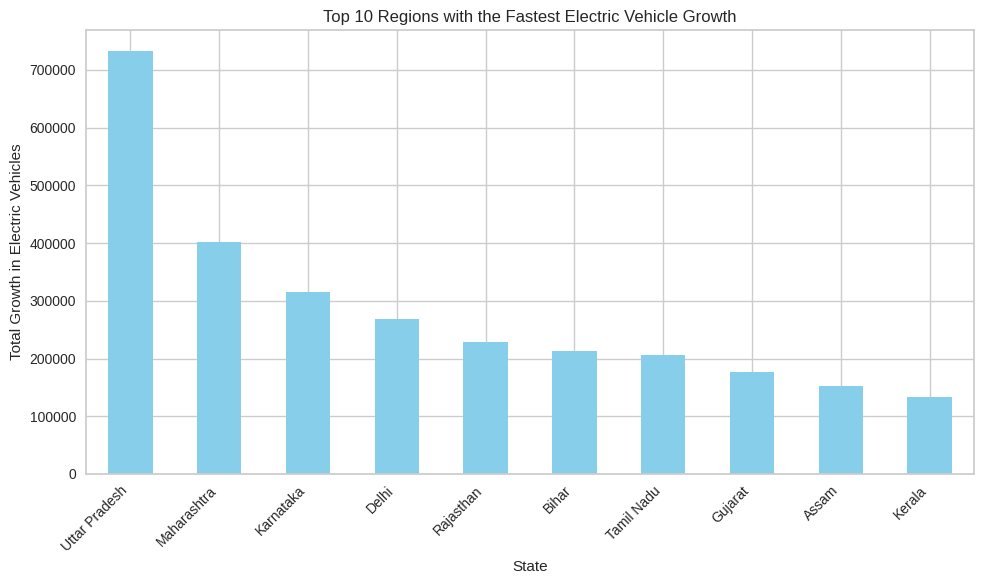

In [25]:
# Aggregating electric vehicle (BOV) data by state and date to see growth by region
electric_vehicle_growth_by_state = data.groupby(['State', 'Date'])['ELECTRIC(BOV)'].sum().unstack(level=0)

# Summing up the growth rate to see which regions have had the highest overall growth
total_ev_growth_by_state = electric_vehicle_growth_by_state.sum().sort_values(ascending=False)
top_ev_growth_states = total_ev_growth_by_state.head(10)

top_ev_growth_states.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Regions with the Fastest Electric Vehicle Growth')
plt.ylabel('Total Growth in Electric Vehicles')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




> Uttar Pradesh leads the top 10 regions with the fastest growth in electric vehicles, followed by Maharashtra and Karnataka, showcasing significant regional adoption.


---





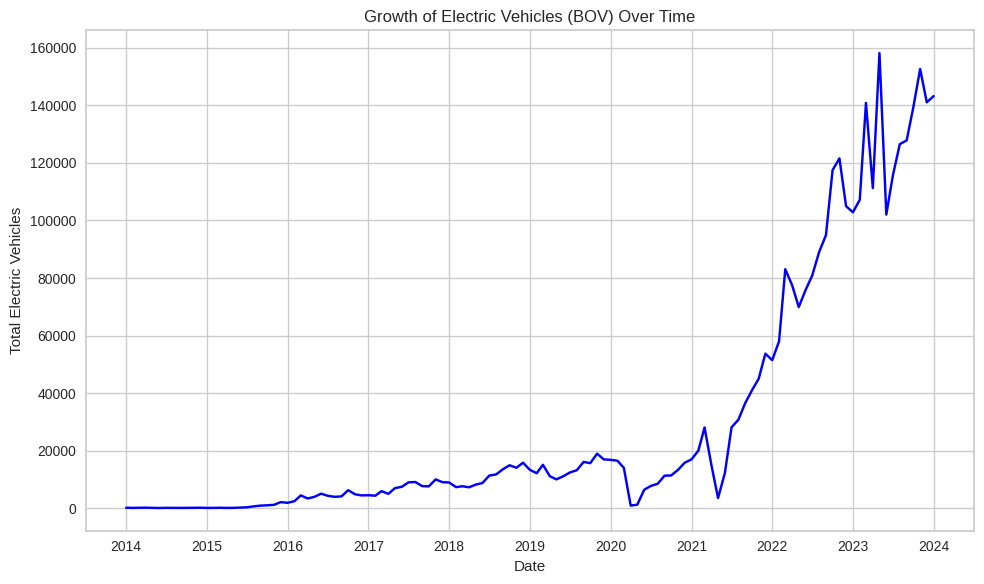

In [26]:
# Aggregating electric vehicle data (BOV) over time by summing it across all dates
electric_vehicle_growth = data.groupby('Date')['ELECTRIC(BOV)'].sum()

plt.figure(figsize=(10, 6))
plt.plot(electric_vehicle_growth.index, electric_vehicle_growth.values, color='blue')
plt.title('Growth of Electric Vehicles (BOV) Over Time')
plt.xlabel('Date')
plt.ylabel('Total Electric Vehicles')
plt.grid(True)
plt.tight_layout()
plt.show()




> The line chart shows a significant growth in the number of Electric (BOV) vehicles over time, particularly from early 2021 onwards. The upward trend indicates accelerating adoption of electric vehicles, with some fluctuations but a clear overall increase in numbers reaching towards 160,000 by 2024.


---





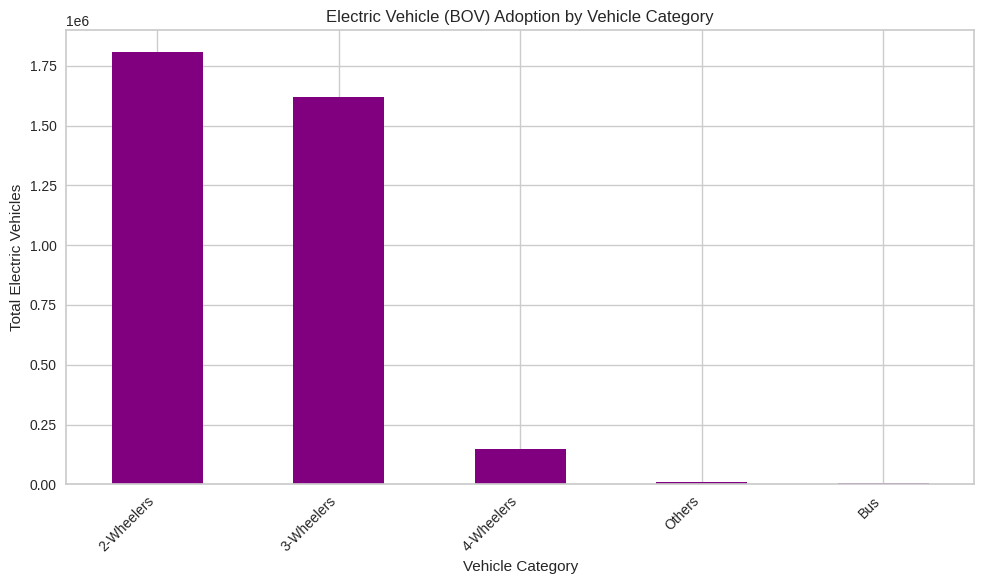

In [27]:
# Aggregating electric vehicle (BOV) data by vehicle category to see total adoption
electric_vehicle_adoption_by_category = data.groupby('Vehicle Category')['ELECTRIC(BOV)'].sum().sort_values(ascending=False)

# Plotting the vehicle categories with the highest electric vehicle adoption
electric_vehicle_adoption_by_category.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Electric Vehicle (BOV) Adoption by Vehicle Category')
plt.ylabel('Total Electric Vehicles')
plt.xlabel('Vehicle Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




> Two-wheelers and three-wheelers dominate Electric Vehicle (BOV) adoption, significantly outpacing four-wheelers and other vehicle categories.



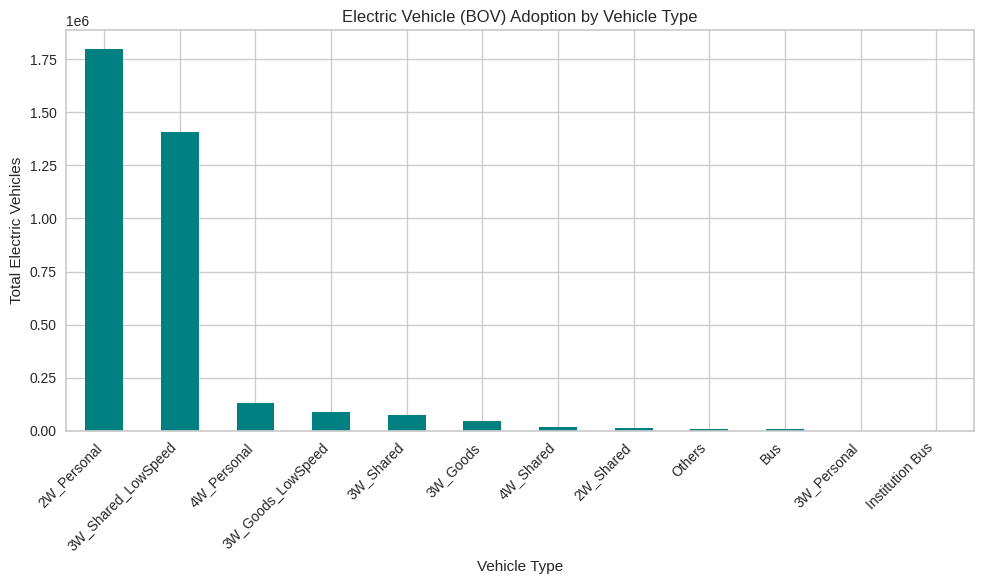

In [28]:
# Aggregating electric vehicle (BOV) data by vehicle type to see total adoption
electric_vehicle_adoption_by_type = data.groupby('Vehicle Type')['ELECTRIC(BOV)'].sum().sort_values(ascending=False)

# Plotting the vehicle types with the highest electric vehicle adoption
electric_vehicle_adoption_by_type.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Electric Vehicle (BOV) Adoption by Vehicle Type')
plt.ylabel('Total Electric Vehicles')
plt.xlabel('Vehicle Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




> Personal two-wheelers lead in electric vehicle (BOV) adoption by a significant margin, followed by personal four-wheelers, highlighting a preference for electric mobility in smaller, personal transport modes.









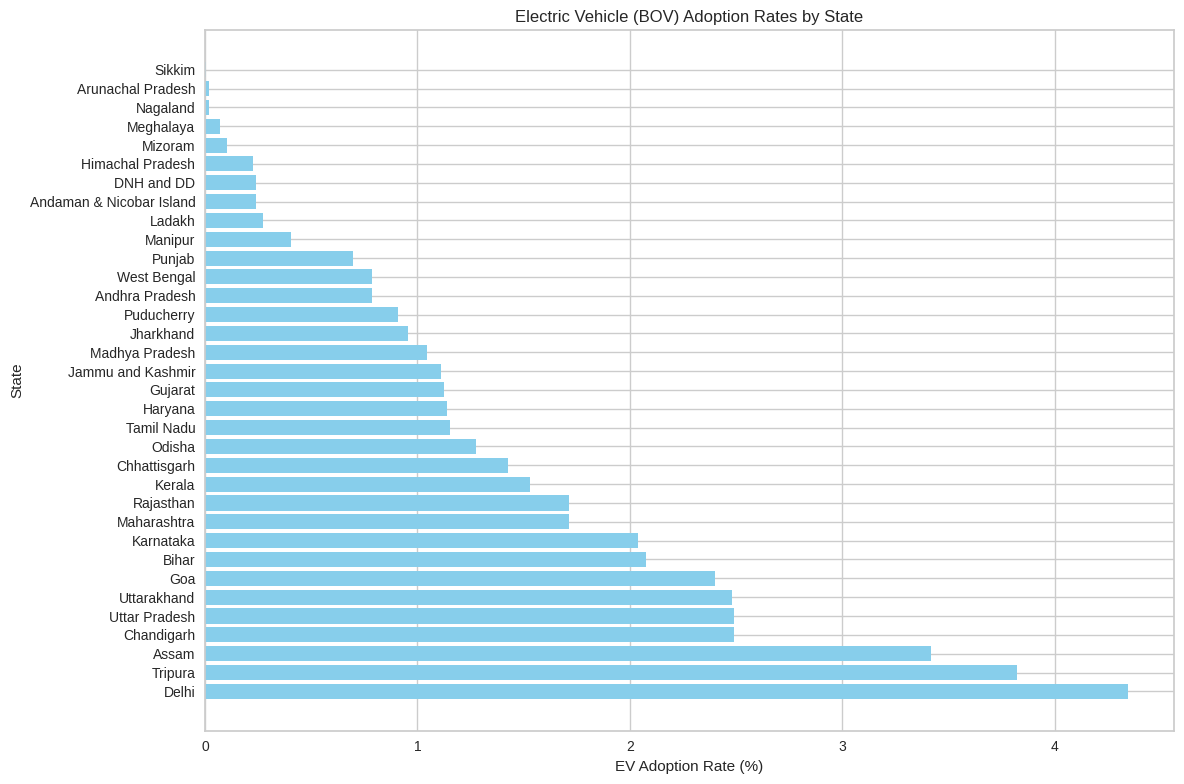

,State,EV_Adoption_Rate
8,Delhi,4.344902
30,Tripura,3.823860
3,Assam,3.416996
5,Chandigarh,2.492514
31,Uttar Pradesh,2.491483
32,Uttarakhand,2.480558
9,Goa,2.401197
4,Bihar,2.073957
15,Karnataka,2.037077
19,Maharashtra,1.714540


In [29]:
# Aggregating EV adoption (Electric BOV) by state and calculating adoption rates
state_ev_data = data.groupby('State').agg({'ELECTRIC(BOV)': 'sum','Total': 'sum'}).reset_index()
# Calculating EV adoption rate as the ratio of electric vehicles to the total number of vehicles
state_ev_data['EV_Adoption_Rate'] = (state_ev_data['ELECTRIC(BOV)'] / state_ev_data['Total']) * 100
state_ev_data_sorted = state_ev_data.sort_values(by='EV_Adoption_Rate', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(state_ev_data_sorted['State'], state_ev_data_sorted['EV_Adoption_Rate'], color='skyblue')
plt.title('Electric Vehicle (BOV) Adoption Rates by State')
plt.xlabel('EV Adoption Rate (%)')
plt.ylabel('State')
plt.tight_layout()
plt.show()
state_ev_data_sorted[['State', 'EV_Adoption_Rate']].head(10)




> Delhi leads in electric vehicle (EV) adoption rates among Indian states, demonstrating the highest percentage of electric vehicle usage, followed by Tripura and Assam.


---




## **Principal Component Analysis (PCA)**

---



In [30]:
# Selecting numeric columns for PCA (excluding categorical)
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Standardizing the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Performing PCA to explain 95% variance
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)

# How much variance is explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Total number of components selected
n_components = pca.n_components_

print("explained_variance_ratio: ",np.cumsum(explained_variance_ratio))
print()
print("n_components: ",n_components)

explained_variance_ratio:  [0.12713858 0.22822711 0.30506318 0.36979125 0.42488231 0.47779089
 0.53042519 0.58305754 0.6356866  0.68812449 0.74022181 0.78970772
 0.83836847 0.88007114 0.91583486 0.94916537 0.97726609]

n_components:  17


In [31]:
# Convert the PCA-transformed data back to a DataFrame for easier interpretation
pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_transformed_df = pd.DataFrame(pca_data, columns=pca_columns)
pca_transformed_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-0.330746,-0.152961,-0.088766,0.049777,-0.063167,-0.025903,-0.003245,0.001124,-0.009879,-0.013807,-0.023555,-0.032352,-0.037888,0.059829,-0.126025,-0.038915,0.015925
1,-0.333865,-0.158736,-0.088593,0.050239,-0.063176,-0.026517,-0.003242,0.001147,-0.009887,-0.014315,-0.024688,-0.030975,-0.041411,0.059873,-0.136302,-0.040488,0.019067
2,-0.304304,-0.169625,-0.088572,0.043106,-0.070016,-0.026633,-0.003297,0.001158,-0.009915,-0.014485,-0.025465,-0.038695,-0.045000,0.047886,-0.136382,-0.045445,0.019773
3,-0.328510,-0.161111,-0.088579,0.048930,-0.064458,-0.026574,-0.003252,0.001151,-0.009893,-0.014376,-0.024899,-0.032341,-0.042288,0.057630,-0.136914,-0.041508,0.019382
4,-0.333990,-0.159183,-0.088580,0.050248,-0.063199,-0.026561,-0.003241,0.001149,-0.009888,-0.014352,-0.024771,-0.030903,-0.041674,0.059836,-0.137034,-0.040616,0.019293




> The PCA analysis selected 17 components to explain 95% of the variance in the dataset, demonstrating that a substantial reduction in dimensionality was achieved while retaining most of the information.



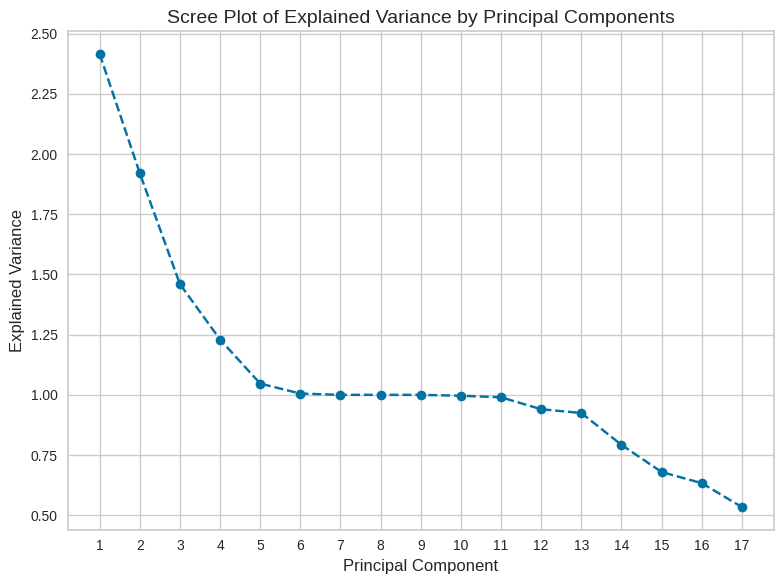

In [32]:
# Enhance the Scree Plot with labels, grid, and a better visual presentation

plt.figure(figsize=(8, 6))
plt.plot(range(1, 18), pca.explained_variance_, marker='o', linestyle='--', color='b')
plt.title('Scree Plot of Explained Variance by Principal Components', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.grid(True)
plt.xticks(range(1, 18))  # Ensures all components are visible
plt.tight_layout()
plt.show()


In [33]:
pca_reduced_df=pca_transformed_df.iloc[:,:6]
pca_reduced_df.sample(5)

,PC1,PC2,PC3,PC4,PC5,PC6
51559,-0.333433,-0.157906,-0.088618,0.050176,-0.063172,-0.026429
51959,-0.328674,-0.148781,-0.088890,0.049485,-0.063124,-0.025465
83456,-0.333865,-0.158736,-0.088593,0.050239,-0.063176,-0.026517
71527,-0.185418,0.125286,-0.097086,0.028664,-0.061744,0.003496
31231,-0.132973,0.207463,-0.009785,0.017236,-0.068017,0.013527




> The first few components in PCA capture the largest amount of variance from the original data. In your case, the first 6 components likely capture a substantial proportion of the variance, providing a compact yet comprehensive view of the data structure.


---





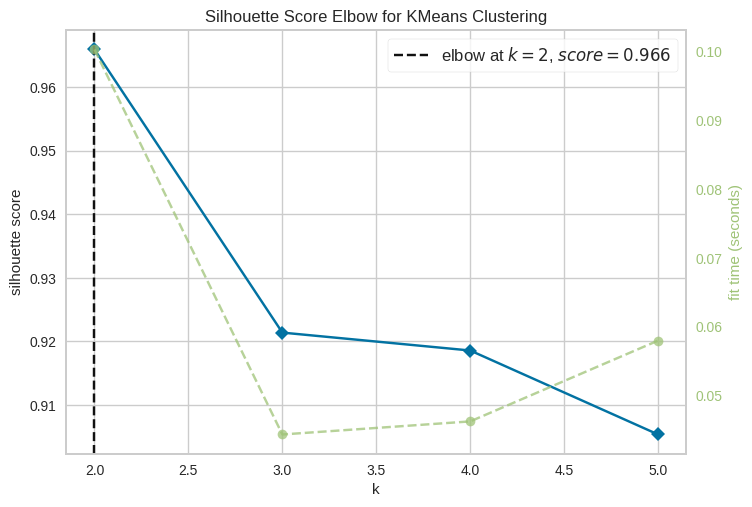

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [34]:
sampled_data = pca_reduced_df.sample(frac=0.5, random_state=2)  # Adjust frac as needed

# Create a KElbowVisualizer object using the silhouette score metric
k_elbow = KElbowVisualizer(KMeans(), k=(2, 6), metric='silhouette')

# Fit the visualizer to the sampled data
k_elbow.fit(sampled_data)

# Display the elbow plot
k_elbow.show()

In [35]:
# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_reduced_df)

# Predict the cluster labels
labels = kmeans.labels_

# Calculate the silhouette score
silhouette = silhouette_score(pca_reduced_df, labels)

print(f"The silhouette score for k=2 is: {silhouette}")


The silhouette score for k=2 is: 0.9216730207853474


In [36]:
# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_reduced_df)

# Predict the cluster labels
labels = kmeans.labels_

# Calculate the silhouette score
silhouette = silhouette_score(pca_reduced_df, labels)

print(f"The silhouette score for k=3 is: {silhouette}")


The silhouette score for k=3 is: 0.9217383962504837




> Based on the silhouette scores provided, the optimal number of clusters
k is 3, as it has a higher silhouette score of 0.9269 compared to 0.9219 for k=2. This indicates that clustering with three groups provides better separation and cohesion among the data points compared to two groups.


---





In [37]:
data['cluster']=labels
centroids = kmeans.cluster_centers_
centroids

array([[ 1.06694781e+01, -4.47163077e+00,  1.49147036e-01,
        -4.43670614e-01, -7.43136870e-01, -8.59055873e-03],
       [-1.85487422e-01, -4.22799181e-02,  6.80564791e-03,
         1.68431037e-03,  6.66099116e-03,  1.71046562e-03],
       [ 5.59072468e+00,  1.05391237e+01, -9.30643409e-01,
         4.14627172e-01,  2.82342504e-01, -1.72064539e-01]])

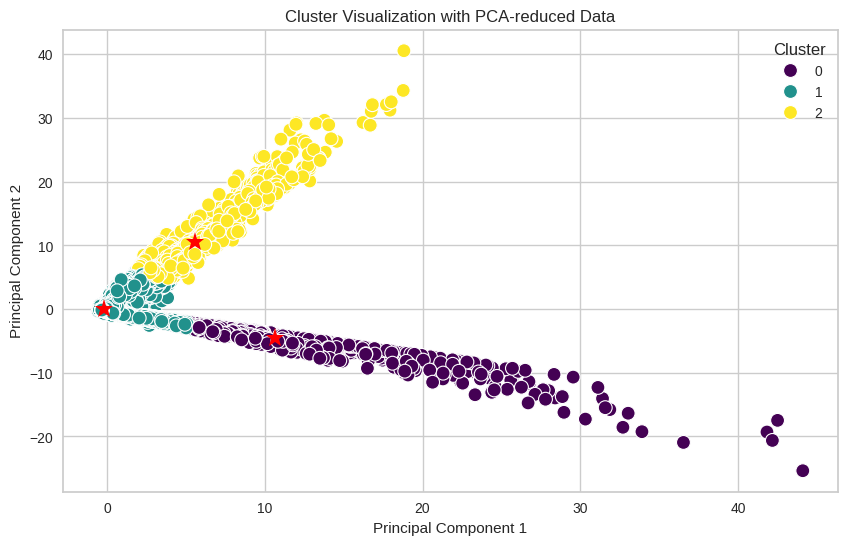

In [38]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=data['cluster'], palette='viridis', data=pca_reduced_df, legend='full', s=100)
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='*',color='red',ms=14)
plt.title('Cluster Visualization with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [46]:
cluster_ev_analysis_df = data.groupby('cluster')[['ELECTRIC(BOV)', 'Vehicle Type']].count()
cluster_ev_analysis_df

,ELECTRIC(BOV),Vehicle Type
cluster,,
0,1185,1185
1,94777,94777
2,883,883


In [41]:
cluster_vehicle_type_df = data.groupby(['cluster', 'Vehicle Type']).size().unstack(fill_value=0)
cluster_vehicle_type_df

Vehicle Type,2W_Personal,2W_Shared,3W_Goods,3W_Goods_LowSpeed,3W_Personal,3W_Shared,3W_Shared_LowSpeed,4W_Personal,4W_Shared,Bus,Institution Bus,Others
cluster,,,,,,,,,,,,
0,1159,0,0,0,0,0,26,0,0,0,0,0
1,10541,1421,3208,1517,1029,3671,1925,3369,4578,7026,2093,54399
2,0,0,0,0,0,115,0,742,2,0,0,24


In [42]:
cluster_state_analysis_df = data.groupby(['cluster', 'State']).size().unstack(fill_value=0)
cluster_state_analysis_df

State,Andaman & Nicobar Island,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,DNH and DD,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Ladakh,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,82,0,9,83,0,7,0,9,0,111,11,0,0,1,116,47,0,102,116,0,0,0,0,24,0,11,111,0,117,0,145,0,83
1,1226,3374,2285,3105,2461,1554,3583,1927,1765,2139,4256,3756,2980,2292,2772,4634,3592,1063,3469,4627,1632,1867,1557,1588,4003,1832,2923,4389,1246,3873,1564,4285,3045,4113
2,0,1,0,0,0,0,0,0,97,0,150,75,0,0,0,80,27,0,16,169,0,0,0,0,0,0,16,52,0,73,0,127,0,0




> **Cluster 1** is the most promising market for electric vehicles, with significant adoption across all vehicle types and strong presence in major states like Andhra Pradesh, Delhi, Maharashtra, Karnataka, and Uttar Pradesh. The company should focus on expanding its EV production and sales in these regions.*


> **Cluster 2** shows limited but growing EV adoption, especially in states like Goa, Gujarat, and Karnataka, where the market is emerging but not yet fully developed.


> **Cluster 0** has minimal EV presence, suggesting it consists of regions where EV adoption is still in the very early stages.


---




## **Modeling EV Growth to 2025 with ARIMA**

---

**`AutoRegressive Integrated Moving Average (ARIMA)`** is a popular time series forecasting model used to predict future points by capturing the patterns in the historical data. It combines three key components:



> **AutoRegressive (AR):** *Refers to using past values to predict future values.*


> **Integrated (I):** *Involves differencing the data to make it stationary (removing trends).*


> **Moving Average (MA):** *Accounts for past forecast errors in predicting future values.*

The model is defined by three parameters: p (number of lag observations), d (number of differences applied), and q (size of the moving average window). In the case of ARIMA (1, 1, 1), it means:

> - p = 1: One previous observation is used.
- d = 1: Data is differenced once to remove trends.
- q = 1: One lag of the forecast error is included.

*ARIMA is well-suited for time series data where trends and patterns need to be accounted for and is commonly used in business, finance, and demand forecasting.*


---



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


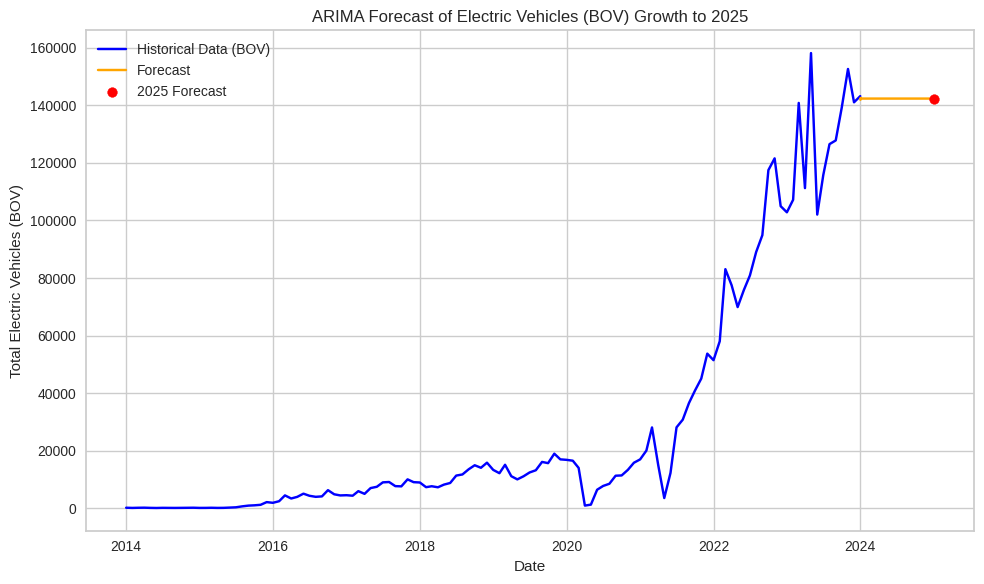

In [65]:
# Fit an ARIMA model (p,d,q) with order (1,1,1) for 'ELECTRIC(BOV)'
arima_model = ARIMA(electric_vehicle_growth['ELECTRIC(BOV)'], order=(1, 1, 1))
arima_result = arima_model.fit()
forecast_steps = 365
forecast = arima_result.forecast(steps=forecast_steps)
plt.figure(figsize=(10, 6))

# Plot the historical data
plt.plot(electric_vehicle_growth.index, electric_vehicle_growth['ELECTRIC(BOV)'], label='Historical Data (BOV)', color='blue')
forecast_index = pd.date_range(start=electric_vehicle_growth.index[-1], periods=forecast_steps+1, freq='D')[1:]
plt.plot(forecast_index, forecast, color='orange', label='Forecast')

# Highlight the forecast for the last day in the forecast period
plt.scatter(forecast_index[-1], forecast[-1], color='red', zorder=5, label='2025 Forecast')
plt.title('ARIMA Forecast of Electric Vehicles (BOV) Growth to 2025')
plt.xlabel('Date')
plt.ylabel('Total Electric Vehicles (BOV)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Which Electric Vehicle (EV) Categories Should the Company Focus On Manufacturing?**

**Mainstream Demand:**
> Given the high representation in Cluster 1 and the vehicle types listed, there is significant demand for both personal and shared vehicles, including 2-wheelers and 4-wheelers.



**Niche Segments:**
> The data also shows considerable numbers for buses and goods vehicles, which might represent a niche market with less competition but potentially high demand.


**Recommendation:**
> The company should consider focusing on 2-wheelers and 4-wheelers for personal and shared use, given their widespread demand across clusters. Additionally, exploring the bus and goods vehicle market could provide a competitive edge if the company has resources to address this segment.


---



## **What are the Target Markets for the Company’s EV Sales?**
**Geographic Focus:**
> Based on state data, the company should target states where EV uptake is highest according to Cluster 1 data, such as Maharashtra, Karnataka, Tamil Nadu, and Rajasthan, as these have shown significant acceptance and usage rates.

**Segment Focus:**
> Selling to both the consumer (personal use) and commercial (shared use, goods transportation) segments can diversify the company's market base and increase resilience against market fluctuations.


---



